In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/marketing_ab_testing_dataset.csv")

In [5]:
df.describe()

,user_id,converted
count,1000.000000,1000.000000
mean,500.500000,0.106000
std,288.819436,0.307992
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,0.000000
75%,750.250000,0.000000
max,1000.000000,1.000000


In [6]:
df.head()

,user_id,group,converted
0,1,Control,0
1,2,Control,1
2,3,Control,0
3,4,Control,0
4,5,Control,0


In [7]:
df.tail()

,user_id,group,converted
995,996,Test,1
996,997,Test,0
997,998,Test,0
998,999,Test,0
999,1000,Test,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1000 non-null   int64 
 1   group      1000 non-null   object
 2   converted  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [10]:
df.dtypes

,0
user_id,int64
group,object
converted,int64


In [12]:
df.shape

(1000, 3)

In [31]:
df["group"].value_counts()

,count
group,
Control,500
Test,500


In [32]:
conversion_rates = df.groupby("group")["converted"].mean()
conversion_rates


,converted
group,
Control,0.096
Test,0.116


In [33]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["group"], df["converted"])

chi2, p, dof, expected = chi2_contingency(contingency)

print("P-value:", p)


P-value: 0.35521065071159164


In [35]:
# If p < 0.05, reject H0

In [36]:
import statsmodels.api as sm

control = df[df["group"]=="control"]["converted"]
test = df[df["group"]=="test"]["converted"]

cm = sm.stats.CompareMeans(sm.stats.DescrStatsW(test),
                           sm.stats.DescrStatsW(control))

ci = cm.tconfint_diff()
ci


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/weightstats.py:135: RuntimeWarning: invalid value encountered in scalar divide
  return self.sum / self.sum_weights
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/weightstats.py:999: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(var_pooled * (1.0 / d1.nobs + 1.0 / d2.nobs))
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/weightstats.py:999: RuntimeWarning: invalid value encountered in scalar multiply
  return np.sqrt(var_pooled * (1.0 / d1.nobs + 1.0 / d2.nobs))


(np.float64(nan), np.float64(nan))

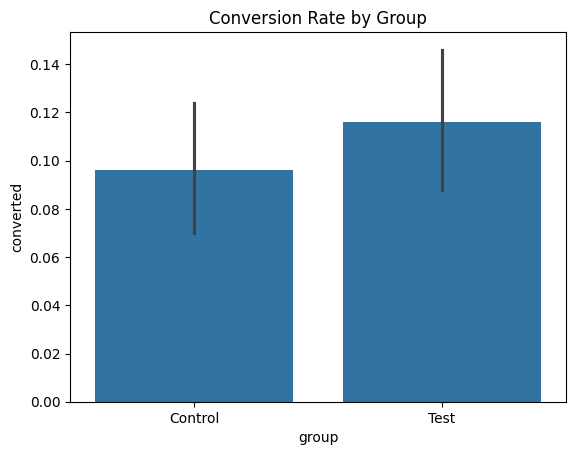

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="group", y="converted", data=df)
plt.title("Conversion Rate by Group")
plt.show()
